<a href="https://colab.research.google.com/github/Bharadwaj6903/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [6]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
## Ferature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [12]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
X=pd.concat([X,geography,gender],axis=1)

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [21]:
### Lets initialize the ANN
classifier=Sequential()

In [22]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [23]:
classifier

In [24]:
# adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))


In [25]:
##adding the third hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [26]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [27]:
classifier.summary()
#input layer wont be shown
#total params = no of (weights + bias)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [31]:
tensorflow.keras.optimizers.rm

AttributeError: module 'keras.api._v2.keras.optimizers' has no attribute 'rm'

In [32]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5

)
#see other parameters in documentation

In [ ]:
X_train.shape

(8000, 11)

In [38]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)
#monitors validation loss

Epoch 1/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3294 - accuracy: 0.8636 - val_loss: 0.3467 - val_accuracy: 0.8595
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3254 - accuracy: 0.8653 - val_loss: 0.3490 - val_accuracy: 0.8580
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3254 - accuracy: 0.8655 - val_loss: 0.3502 - val_accuracy: 0.8576
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3287 - accuracy: 0.8634 - val_loss: 0.3504 - val_accuracy: 0.8591
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3251 - accuracy: 0.8660 - val_loss: 0.3557 - val_accuracy: 0.8554
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3215 - accuracy: 0.8701 - val_loss: 0.3577 - val_accuracy: 0.8504


In [37]:
#model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)
#monitors validation loss

Epoch 1/100
800/800 [==============================] - 8s 10ms/step - loss: 0.3420 - accuracy: 0.8618 - val_loss: 0.3453 - val_accuracy: 0.8590
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3413 - accuracy: 0.8620 - val_loss: 0.3579 - val_accuracy: 0.8585
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3407 - accuracy: 0.8612 - val_loss: 0.3369 - val_accuracy: 0.8600
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3383 - accuracy: 0.8604 - val_loss: 0.3402 - val_accuracy: 0.8580
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3403 - accuracy: 0.8616 - val_loss: 0.3367 - val_accuracy: 0.8635
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3389 - accuracy: 0.8633 - val_loss: 0.3435 - val_accuracy: 0.8600
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3390 - accuracy: 0.8599 - val_loss: 0.3352 - val_accuracy: 0.864

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

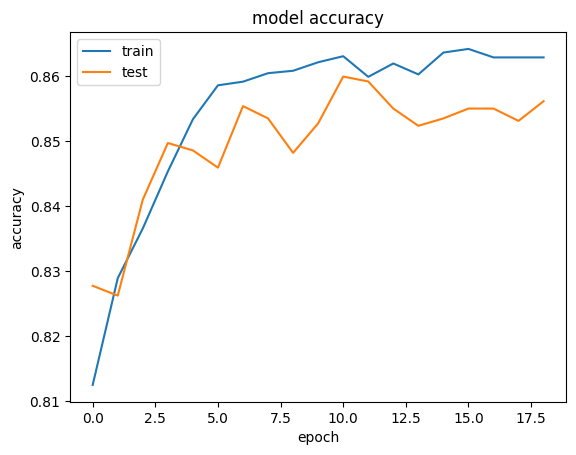

In [35]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

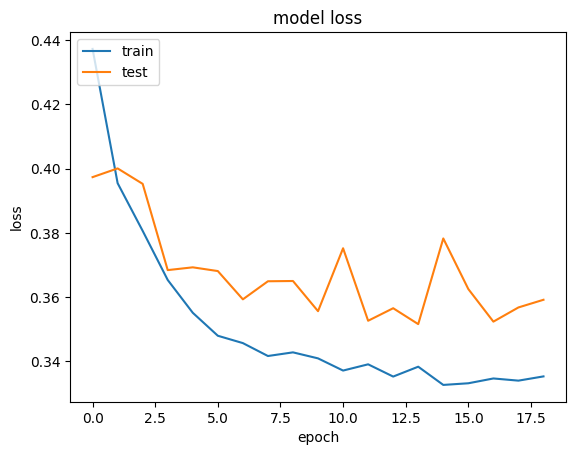

In [36]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test) #we will get y_pred in probability
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [48]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [40]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1557,   38],
       [ 250,  155]])

In [42]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [43]:
score

0.856

In [44]:
##get the weights
classifier.get_weights()

[array([[-2.05795631e-01, -6.75082386e-01,  2.94968516e-01,
         -3.81640017e-01, -9.66444314e-01, -1.97463855e-02,
          8.40397179e-01, -1.98159561e-01, -5.29241145e-01,
         -3.68003994e-01],
        [ 1.33044100e+00, -3.60882473e+00, -9.44431841e-01,
          2.59490705e+00, -1.53199100e+00, -1.52593017e+00,
         -1.29815221e+00, -2.51702523e+00,  1.16010582e+00,
         -2.95639813e-01],
        [ 8.31807330e-02, -5.21878302e-01,  1.10222948e+00,
          3.41836214e-02, -6.41550779e-01, -3.14836025e-01,
         -1.45492387e+00,  6.56906188e-01,  1.68400884e-01,
          5.25902867e-01],
        [ 3.25989515e-01, -4.77630228e-01, -1.94599199e+00,
         -1.12851608e+00,  6.19950056e-01, -1.40992808e+00,
         -2.11023974e+00, -4.23831969e-01, -9.27559614e-01,
         -4.23720121e+00],
        [ 3.28261185e+00, -2.42668796e+00, -6.17337763e-01,
         -9.30994093e-01, -5.60648203e-01, -7.22206950e-01,
         -5.33832073e-01, -8.50406528e-01, -4.757689

In [45]:
## Saving h5 file
classifier.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [47]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.22792591],
       [0.28952932],
       [0.27608386],
       ...,
       [0.11075424],
       [0.20092143],
       [0.23088738]], dtype=float32)

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
## Regression
## Divide the dataset into independent and dependent features

X=dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y=dataset.iloc[:,12]

In [50]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [51]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [52]:
## Ferature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1)
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1)) #activation='linear'




In [53]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
import tensorflow
mse=tensorflow.keras.losses.MeanSquaredError(  #from documentation
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [64]:

regressor.compile(optimizer=opt,loss=mse,metrics=['mae']) #metrics=metrics

In [65]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=20

)

In [66]:
model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 5445324288.0000 - mae: 60396.5703 - val_loss: 3380607744.0000 - val_mae: 50030.3516
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 3377159936.0000 - mae: 50070.4727 - val_loss: 3351070720.0000 - val_mae: 49881.7695
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 3353452800.0000 - mae: 49910.9805 - val_loss: 3333093632.0000 - val_mae: 49713.2109
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 3344352768.0000 - mae: 49895.5859 - val_loss: 3336622848.0000 - val_mae: 49713.6562
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 3339943936.0000 - mae: 49841.4102 - val_loss: 3332240384.0000 - val_mae: 49684.7383
Epoch 6/100
800/800 [==============================] - 4s 4ms/step - loss: 3332549888.0000 - mae: 49797.1094 - val_loss: 3328973824.0000 - val_mae: 49671.8672
Epoch 7/100
800/800 [=========================

In [67]:
y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
1037    180969.55
2899     70760.69
9549    141533.19
2740     11276.48
6690    192950.60
Name: EstimatedSalary, Length: 2000, dtype: float64

In [68]:
y_pred=regressor.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [69]:
y_pred

array([[107701.26],
       [110422.79],
       [ 96582.23],
       ...,
       [ 98916.83],
       [102842.76],
       [107614.23]], dtype=float32)

In [70]:
from sklearn.metrics import r2_score

In [71]:
print(r2_score(y_test,y_pred)) #worst model

-0.013129812547035158


In [72]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,-0.506242,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.506242,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,-0.506242,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
